In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

In [2]:

data = pd.read_csv("book_reviews_sample.csv") # the data should be in the same folder as your notebook
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [3]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [4]:
data['reviewText_clean'] = data['reviewText'].str.lower()

In [5]:
data['reviewText_clean'] = data['reviewText_clean'].str.replace(r"[^\w\s]", " ", regex=True)

In [6]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [8]:
#APPLY VADER SENTIMENT ANALYSIS 

In [7]:
vader_sentiment = SentimentIntensityAnalyzer() #Vader comes with a predefined sentiment lexicon

In [9]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [10]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [13]:

# create labels
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

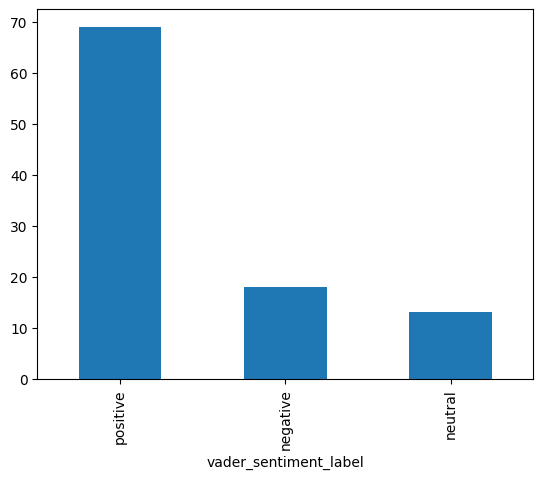

In [14]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [15]:
transformer_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [18]:
transformer_label = []
for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_label.append(sentiment_label)
data['transformer_sentiment_label'] = transformer_label

<Axes: xlabel='transformer_sentiment_label'>

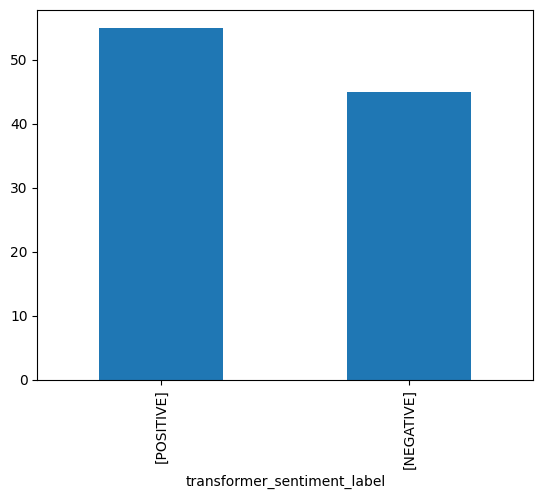

In [19]:
data['transformer_sentiment_label'].value_counts().plot.bar()

In [ ]:
#we can use another transformer models from the hugging face transformers website 